In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv("wines.csv")

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#in this dataset we have to predict the class of wine depending on the various ingredients

#there are 3 classes of wines, therefore our output layer will have 3 neurons 1 for each class

#since there are 3 output hence this is multiple classification

In [5]:
y = df['Class']
#categorical variable

In [6]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
y_categorical = pd.get_dummies(y)

#here we did not use drop columns = true bec this is what we have to predict

In [8]:
X= df.drop('Class' , axis = 1)


In [9]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic_acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280-OD315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [11]:
import seaborn as sns

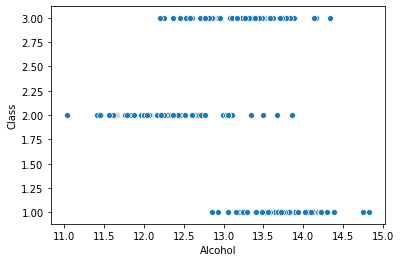

In [12]:
sns.scatterplot(x = 'Alcohol', y =y , data = df)

In [13]:
from keras.models import Sequential


Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
from keras.layers import Dense


In [16]:
model.add(Dense(units = 350, input_shape=(13,), activation="relu", kernel_initializer='he_normal'))

In [17]:
model.summary()

#param = 70 i.e. different combinations of w and b

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 350)               4900      
Total params: 4,900
Trainable params: 4,900
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Dense(units= 280, activation= 'relu', kernel_initializer='he_normal'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 350)               4900      
_________________________________________________________________
dense_2 (Dense)              (None, 280)               98280     
Total params: 103,180
Trainable params: 103,180
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(Dense(units = 270, activation="relu", kernel_initializer= "he_normal"))

In [21]:
model.add(Dense(units = 170, activation="relu", kernel_initializer= "he_normal"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 350)               4900      
_________________________________________________________________
dense_2 (Dense)              (None, 280)               98280     
_________________________________________________________________
dense_3 (Dense)              (None, 270)               75870     
_________________________________________________________________
dense_4 (Dense)              (None, 170)               46070     
Total params: 225,120
Trainable params: 225,120
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(Dense(units=3, activation= 'softmax'))

#output layer
#3 neurons one for each class 
#for binary activation is sigmoid and for multiple - softmax

In [24]:
from keras.optimizers import RMSprop

In [25]:
model.compile(optimizer= RMSprop(learning_rate=0.000001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

#metrics to get accuracy after every epoch

In [26]:
model.layers[0].input

<tf.Tensor 'dense_1_input:0' shape=(None, 13) dtype=float32>

In [27]:
model.layers[3].output

<tf.Tensor 'dense_4/Relu:0' shape=(None, 170) dtype=float32>

In [28]:
model.fit(X, y_categorical, epochs =1000)

Epoch 1/1000
178/178 [==============================] - 0s 1ms/step - loss: 268.7372 - accuracy: 0.3989
Epoch 2/1000
178/178 [==============================] - 0s 191us/step - loss: 259.1055 - accuracy: 0.3989
Epoch 3/1000
178/178 [==============================] - 0s 218us/step - loss: 251.9816 - accuracy: 0.3989
Epoch 4/1000
178/178 [==============================] - 0s 202us/step - loss: 245.3622 - accuracy: 0.3989
Epoch 5/1000
178/178 [==============================] - 0s 179us/step - loss: 239.2204 - accuracy: 0.3989
Epoch 6/1000
178/178 [==============================] - 0s 207us/step - loss: 233.1156 - accuracy: 0.3989
Epoch 7/1000
178/178 [==============================] - 0s 207us/step - loss: 226.9857 - accuracy: 0.3989
Epoch 8/1000
178/178 [==============================] - 0s 179us/step - loss: 220.8440 - accuracy: 0.3989
Epoch 9/1000
178/178 [==============================] - 0s 185us/step - loss: 214.7851 - accuracy: 0.3989
Epoch 10/1000
178/178 [=========================

Epoch 78/1000
178/178 [==============================] - 0s 185us/step - loss: 51.7121 - accuracy: 0.5562
Epoch 79/1000
178/178 [==============================] - 0s 202us/step - loss: 50.2359 - accuracy: 0.5449
Epoch 80/1000
178/178 [==============================] - 0s 157us/step - loss: 48.8298 - accuracy: 0.5393
Epoch 81/1000
178/178 [==============================] - 0s 146us/step - loss: 47.4595 - accuracy: 0.5393
Epoch 82/1000
178/178 [==============================] - 0s 168us/step - loss: 45.9774 - accuracy: 0.5506
Epoch 83/1000
178/178 [==============================] - 0s 162us/step - loss: 44.4797 - accuracy: 0.5449
Epoch 84/1000
178/178 [==============================] - 0s 146us/step - loss: 43.0687 - accuracy: 0.5337
Epoch 85/1000
178/178 [==============================] - 0s 146us/step - loss: 41.6500 - accuracy: 0.5449
Epoch 86/1000
178/178 [==============================] - 0s 140us/step - loss: 40.2552 - accuracy: 0.5506
Epoch 87/1000
178/178 [=======================

178/178 [==============================] - 0s 146us/step - loss: 1.7004 - accuracy: 0.6798
Epoch 156/1000
178/178 [==============================] - 0s 129us/step - loss: 1.7124 - accuracy: 0.6461
Epoch 157/1000
178/178 [==============================] - 0s 157us/step - loss: 1.6470 - accuracy: 0.6685
Epoch 158/1000
178/178 [==============================] - 0s 151us/step - loss: 1.6641 - accuracy: 0.6461
Epoch 159/1000
178/178 [==============================] - 0s 151us/step - loss: 1.6969 - accuracy: 0.6573
Epoch 160/1000
178/178 [==============================] - 0s 151us/step - loss: 1.6864 - accuracy: 0.6292
Epoch 161/1000
178/178 [==============================] - 0s 151us/step - loss: 1.6549 - accuracy: 0.6629
Epoch 162/1000
178/178 [==============================] - 0s 157us/step - loss: 1.6271 - accuracy: 0.6629
Epoch 163/1000
178/178 [==============================] - 0s 157us/step - loss: 1.6345 - accuracy: 0.6798
Epoch 164/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 179us/step - loss: 1.3075 - accuracy: 0.6798
Epoch 233/1000
178/178 [==============================] - 0s 162us/step - loss: 1.3301 - accuracy: 0.7079
Epoch 234/1000
178/178 [==============================] - 0s 191us/step - loss: 1.3134 - accuracy: 0.7135
Epoch 235/1000
178/178 [==============================] - 0s 162us/step - loss: 1.3176 - accuracy: 0.6798
Epoch 236/1000
178/178 [==============================] - 0s 157us/step - loss: 1.2841 - accuracy: 0.7135
Epoch 237/1000
178/178 [==============================] - 0s 157us/step - loss: 1.2857 - accuracy: 0.7079
Epoch 238/1000
178/178 [==============================] - 0s 151us/step - loss: 1.3007 - accuracy: 0.7135
Epoch 239/1000
178/178 [==============================] - 0s 151us/step - loss: 1.2784 - accuracy: 0.7247
Epoch 240/1000
178/178 [==============================] - 0s 151us/step - loss: 1.3190 - accuracy: 0.7022
Epoch 241/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 157us/step - loss: 1.0666 - accuracy: 0.7416
Epoch 310/1000
178/178 [==============================] - 0s 146us/step - loss: 1.0909 - accuracy: 0.7303
Epoch 311/1000
178/178 [==============================] - 0s 146us/step - loss: 1.0621 - accuracy: 0.7472
Epoch 312/1000
178/178 [==============================] - 0s 140us/step - loss: 1.0952 - accuracy: 0.7360
Epoch 313/1000
178/178 [==============================] - 0s 157us/step - loss: 1.0938 - accuracy: 0.7584
Epoch 314/1000
178/178 [==============================] - 0s 162us/step - loss: 1.0359 - accuracy: 0.7640
Epoch 315/1000
178/178 [==============================] - 0s 179us/step - loss: 1.0681 - accuracy: 0.7472
Epoch 316/1000
178/178 [==============================] - 0s 163us/step - loss: 1.0421 - accuracy: 0.7191
Epoch 317/1000
178/178 [==============================] - 0s 174us/step - loss: 1.0324 - accuracy: 0.7584
Epoch 318/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 191us/step - loss: 0.8748 - accuracy: 0.7921
Epoch 387/1000
178/178 [==============================] - 0s 179us/step - loss: 0.9464 - accuracy: 0.7640
Epoch 388/1000
178/178 [==============================] - 0s 168us/step - loss: 0.8714 - accuracy: 0.8034
Epoch 389/1000
178/178 [==============================] - 0s 179us/step - loss: 0.9192 - accuracy: 0.7697
Epoch 390/1000
178/178 [==============================] - 0s 174us/step - loss: 0.8681 - accuracy: 0.7640
Epoch 391/1000
178/178 [==============================] - 0s 168us/step - loss: 0.8911 - accuracy: 0.7921
Epoch 392/1000
178/178 [==============================] - 0s 179us/step - loss: 0.8896 - accuracy: 0.7921
Epoch 393/1000
178/178 [==============================] - 0s 168us/step - loss: 0.8547 - accuracy: 0.7921
Epoch 394/1000
178/178 [==============================] - 0s 168us/step - loss: 0.9451 - accuracy: 0.7584
Epoch 395/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 146us/step - loss: 0.8347 - accuracy: 0.7921
Epoch 464/1000
178/178 [==============================] - 0s 174us/step - loss: 0.7895 - accuracy: 0.8034
Epoch 465/1000
178/178 [==============================] - 0s 191us/step - loss: 0.8036 - accuracy: 0.8090
Epoch 466/1000
178/178 [==============================] - 0s 185us/step - loss: 0.8145 - accuracy: 0.7978
Epoch 467/1000
178/178 [==============================] - 0s 185us/step - loss: 0.8030 - accuracy: 0.8146
Epoch 468/1000
178/178 [==============================] - 0s 140us/step - loss: 0.8052 - accuracy: 0.8258
Epoch 469/1000
178/178 [==============================] - 0s 174us/step - loss: 0.8257 - accuracy: 0.8034
Epoch 470/1000
178/178 [==============================] - 0s 207us/step - loss: 0.8132 - accuracy: 0.8146
Epoch 471/1000
178/178 [==============================] - 0s 157us/step - loss: 0.8622 - accuracy: 0.7697
Epoch 472/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 151us/step - loss: 0.7479 - accuracy: 0.8371
Epoch 541/1000
178/178 [==============================] - 0s 207us/step - loss: 0.7445 - accuracy: 0.8146
Epoch 542/1000
178/178 [==============================] - 0s 168us/step - loss: 0.7566 - accuracy: 0.8090
Epoch 543/1000
178/178 [==============================] - 0s 157us/step - loss: 0.7367 - accuracy: 0.8315
Epoch 544/1000
178/178 [==============================] - 0s 185us/step - loss: 0.7275 - accuracy: 0.8090
Epoch 545/1000
178/178 [==============================] - 0s 174us/step - loss: 0.7194 - accuracy: 0.8539
Epoch 546/1000
178/178 [==============================] - 0s 179us/step - loss: 0.7409 - accuracy: 0.8202
Epoch 547/1000
178/178 [==============================] - 0s 179us/step - loss: 0.7369 - accuracy: 0.8202
Epoch 548/1000
178/178 [==============================] - 0s 174us/step - loss: 0.7607 - accuracy: 0.8427
Epoch 549/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 191us/step - loss: 0.6794 - accuracy: 0.8146
Epoch 618/1000
178/178 [==============================] - 0s 191us/step - loss: 0.6825 - accuracy: 0.8258
Epoch 619/1000
178/178 [==============================] - 0s 202us/step - loss: 0.7106 - accuracy: 0.8146
Epoch 620/1000
178/178 [==============================] - 0s 134us/step - loss: 0.6820 - accuracy: 0.8258
Epoch 621/1000
178/178 [==============================] - 0s 134us/step - loss: 0.6863 - accuracy: 0.8315
Epoch 622/1000
178/178 [==============================] - 0s 151us/step - loss: 0.7534 - accuracy: 0.8034
Epoch 623/1000
178/178 [==============================] - 0s 162us/step - loss: 0.6680 - accuracy: 0.8483
Epoch 624/1000
178/178 [==============================] - 0s 163us/step - loss: 0.6853 - accuracy: 0.8146
Epoch 625/1000
178/178 [==============================] - 0s 157us/step - loss: 0.6809 - accuracy: 0.8483
Epoch 626/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 174us/step - loss: 0.6341 - accuracy: 0.8315
Epoch 695/1000
178/178 [==============================] - 0s 162us/step - loss: 0.6253 - accuracy: 0.8539
Epoch 696/1000
178/178 [==============================] - 0s 191us/step - loss: 0.6418 - accuracy: 0.8146
Epoch 697/1000
178/178 [==============================] - 0s 179us/step - loss: 0.6387 - accuracy: 0.8371
Epoch 698/1000
178/178 [==============================] - 0s 168us/step - loss: 0.6287 - accuracy: 0.8427
Epoch 699/1000
178/178 [==============================] - 0s 163us/step - loss: 0.6850 - accuracy: 0.8202
Epoch 700/1000
178/178 [==============================] - 0s 146us/step - loss: 0.6290 - accuracy: 0.8371
Epoch 701/1000
178/178 [==============================] - 0s 140us/step - loss: 0.6221 - accuracy: 0.8539
Epoch 702/1000
178/178 [==============================] - 0s 146us/step - loss: 0.6424 - accuracy: 0.8202
Epoch 703/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 168us/step - loss: 0.5833 - accuracy: 0.8483
Epoch 772/1000
178/178 [==============================] - 0s 163us/step - loss: 0.6190 - accuracy: 0.8371
Epoch 773/1000
178/178 [==============================] - 0s 140us/step - loss: 0.5790 - accuracy: 0.8483
Epoch 774/1000
178/178 [==============================] - 0s 151us/step - loss: 0.6149 - accuracy: 0.8483
Epoch 775/1000
178/178 [==============================] - 0s 151us/step - loss: 0.5732 - accuracy: 0.8596
Epoch 776/1000
178/178 [==============================] - 0s 224us/step - loss: 0.6206 - accuracy: 0.8315
Epoch 777/1000
178/178 [==============================] - 0s 129us/step - loss: 0.6092 - accuracy: 0.8483
Epoch 778/1000
178/178 [==============================] - 0s 146us/step - loss: 0.5853 - accuracy: 0.8483
Epoch 779/1000
178/178 [==============================] - 0s 151us/step - loss: 0.5973 - accuracy: 0.8483
Epoch 780/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 168us/step - loss: 0.5570 - accuracy: 0.8427
Epoch 849/1000
178/178 [==============================] - 0s 157us/step - loss: 0.5579 - accuracy: 0.8427
Epoch 850/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5529 - accuracy: 0.8427
Epoch 851/1000
178/178 [==============================] - 0s 168us/step - loss: 0.5553 - accuracy: 0.8483
Epoch 852/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5396 - accuracy: 0.8427
Epoch 853/1000
178/178 [==============================] - 0s 162us/step - loss: 0.5506 - accuracy: 0.8539
Epoch 854/1000
178/178 [==============================] - 0s 179us/step - loss: 0.5600 - accuracy: 0.8483
Epoch 855/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5534 - accuracy: 0.8596
Epoch 856/1000
178/178 [==============================] - 0s 179us/step - loss: 0.5767 - accuracy: 0.8146
Epoch 857/1000
178/178 [==============================] - 0s 

178/178 [==============================] - 0s 179us/step - loss: 0.5370 - accuracy: 0.8539
Epoch 926/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5105 - accuracy: 0.8539
Epoch 927/1000
178/178 [==============================] - 0s 179us/step - loss: 0.5181 - accuracy: 0.8652
Epoch 928/1000
178/178 [==============================] - 0s 162us/step - loss: 0.5214 - accuracy: 0.8483
Epoch 929/1000
178/178 [==============================] - 0s 191us/step - loss: 0.5414 - accuracy: 0.8652
Epoch 930/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5380 - accuracy: 0.8427
Epoch 931/1000
178/178 [==============================] - 0s 174us/step - loss: 0.5201 - accuracy: 0.8596
Epoch 932/1000
178/178 [==============================] - 0s 185us/step - loss: 0.5609 - accuracy: 0.8483
Epoch 933/1000
178/178 [==============================] - 0s 196us/step - loss: 0.5201 - accuracy: 0.8483
Epoch 934/1000
178/178 [==============================] - 0s 

In [29]:
model.save("modelsave.h5")

In [ ]:
model.predict()